In [1]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline
logging.getLogger("keyring").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

import platform
BASEDIR = "/u/timoh/phd" if "freya" in platform.node() else ""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
display(HTML("<style>.output_html { display: block; margin-left: auto; margin-right: auto; }</style>"))

In [3]:
import sys
import numpy
import scipy
from matplotlib import pyplot

if "/tidalshocks/src" not in sys.path:
    sys.path.insert(0, "{}/tidalshocks/src".format(BASEDIR))
from gc_simulation import StarClusterSimulation

if "/supaharris" not in sys.path: 
    sys.path.insert(0, "{}/supaharris".format(BASEDIR))
from utils import parsec2arcmin

 Model scaled to: G = 1, M = 1, rt = 1

 Model properties: 
 ----------------- 
 phi0 =  8.58; g = 1.00
 Converged = True
 M =  1.000e+00; U = -4.266e+00; K = 2.133e+00; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.069; rh/r0 = 11.103; rt/r0 = 101.292; ra/rh = 9006670.067
limepy.limepy took 0.08 s
 sample r ...
 sample v ...
   set-up segments for velocity cdf ...
   compute cdf ...
   (rejection) sampling of k^3/2 values ...
   sample angles ...
 convert to cartesian coordinates ...
 done! 
       U: sample =  -4.2636e+00; model =  -4.2663e+00
       K: sample =   2.1420e+00; model =   2.1332e+00
       Q: sample =  -5.0239e-01; model =  -5.0000e-01
  2Kr/Kt: sample =       0.9972; model =       1.0000
limepy.sample took 9.99 s
convert to AMUSE took 0.02 s
limepy_to_amuse, pre-converter business
  G:      1.0 length**3 / (mass * time**2)
  com:    [1.36541711097e-18, -1.13502414932e-18, 5.29395592034e-19] length
  comvel: [2.38524477947e-18, -1.53956708493e-17, 1.08691267792e-17] length * t

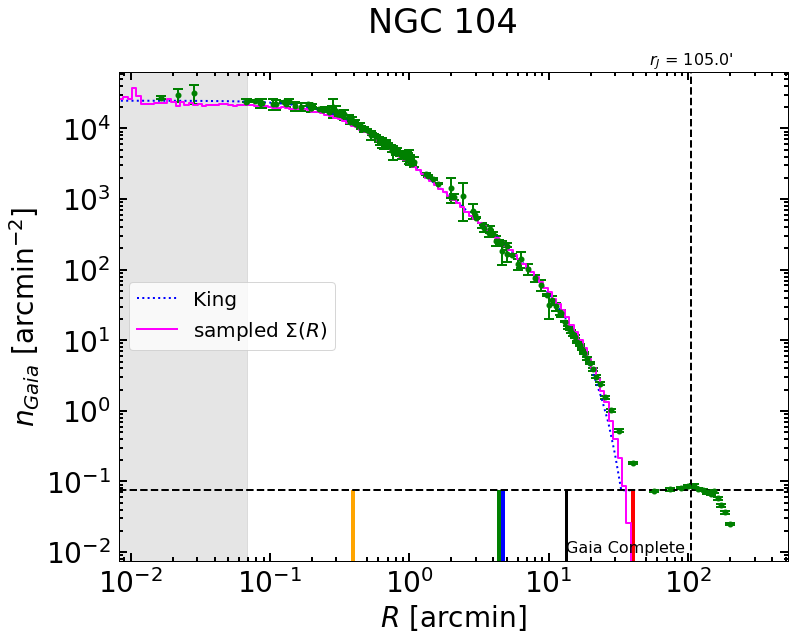

In [28]:
from amuse.units import units
from amuse.io import read_set_from_file

Nstars = 50000
Nbins = int(numpy.sqrt(Nstars))
sim = StarClusterSimulation(logger, "NGC 104")
king_model, king_limepy_sampled, king_amuse_sampled, king_converter = \
    sim.sample_deBoer2019_bestfit_king(Nstars=Nstars, verbose=True)

fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
sim.add_deBoer2019_to_fig(fig, show_King=True)

# sim.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="rho",
#     model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)
sim.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="Sigma",
    model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)

ax.legend(fontsize=20)
pyplot.savefig("{0}{1}_sampled.png".format(sim.outdir, sim.gc_name))
pyplot.show(fig)


# Mass
# fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
# sim.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="mc",
#     model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)
# pyplot.show(fig)

In [ ]:
sim.analyse_isolation(king_model)

Found 1 snapshots
  Loading snapshot: /tidalshocks/out/NGC 104/NGC 104_isolation_T=0.00_i=0000.hdf5
107803.319 MSun
[4.82652586749e-17, -2.92338355389e-17, 2.23668271908e-17] parsec
  This snapshot was saved at T=0.00 Myr

get_radial_profiles
  center: [  4.82652587e-17  -2.92338355e-17   2.23668272e-17]
  p.com:  [  4.82652587e-17  -2.92338355e-17   2.23668272e-17]
  Mtot:   107803.319 MSun
  Ekin:   5.31118363022e+42 J
